In [89]:
##Importing data set###

In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import re
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier  
from sklearn.tree import DecisionTreeClassifier  


In [91]:
import pandas as pd 
df =pd.read_csv("D:\\GeekLurnDocument\\Proj2_Train.csv")
df

,Sl No,Sample ID,Age,Ob_Score,BMI,Consistency_Score,Position_Score,Effacement_Score,Dialation_Score,Station_Score,Total_Bishop_Score,Cerv_Len_cms,Cerv_Wid_cms,Induction,Del_mode
0,1,DT1,20,G1,28.255713,2,0,0,1,0,3,NaN,NaN,1,1
1,2,DT2,21,G1,29.772191,2,0,1,1,0,4,NaN,NaN,1,1
2,3,DT3,21,G1,28.511248,2,0,1,1,0,4,NaN,NaN,1,1
3,4,DT4,22,G1,28.772695,2,0,1,1,0,4,NaN,NaN,1,1
4,5,DT5,22,G1,27.488918,2,0,0,1,0,3,NaN,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,DT996,23,G1,27.905103,2,1,1,0,0,4,NaN,NaN,1,0
996,997,DT997,25,G1,29.526327,2,0,0,0,1,3,2.305779,0.932645,1,0
997,998,DT998,24,G1,24.145776,2,1,1,1,0,5,NaN,NaN,1,0
998,999,DT999,22,G1,29.620395,2,0,0,1,0,3,2.211644,1.624391,1,0


In [92]:
df.head()
df.shape

(1000, 15)

In [93]:
df.info()    #checking data types.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sl No               1000 non-null   int64  
 1   Sample ID           1000 non-null   object 
 2   Age                 1000 non-null   int64  
 3   Ob_Score            1000 non-null   object 
 4   BMI                 1000 non-null   float64
 5   Consistency_Score   1000 non-null   int64  
 6   Position_Score      1000 non-null   int64  
 7   Effacement_Score    1000 non-null   int64  
 8   Dialation_Score     1000 non-null   int64  
 9   Station_Score       1000 non-null   int64  
 10  Total_Bishop_Score  1000 non-null   int64  
 11  Cerv_Len_cms        390 non-null    float64
 12  Cerv_Wid_cms        390 non-null    float64
 13  Induction           1000 non-null   int64  
 14  Del_mode            1000 non-null   int64  
dtypes: float64(3), int64(10), object(2)
memory usage: 117.3+

In [94]:
df.isnull().sum()  #checking null value

Sl No                   0
Sample ID               0
Age                     0
Ob_Score                0
BMI                     0
Consistency_Score       0
Position_Score          0
Effacement_Score        0
Dialation_Score         0
Station_Score           0
Total_Bishop_Score      0
Cerv_Len_cms          610
Cerv_Wid_cms          610
Induction               0
Del_mode                0
dtype: int64

In [95]:
# duplicate rows
df.duplicated().sum()

0

In [96]:
df.head(10)

,Sl No,Sample ID,Age,Ob_Score,BMI,Consistency_Score,Position_Score,Effacement_Score,Dialation_Score,Station_Score,Total_Bishop_Score,Cerv_Len_cms,Cerv_Wid_cms,Induction,Del_mode
0,1,DT1,20,G1,28.255713,2,0,0,1,0,3,NaN,NaN,1,1
1,2,DT2,21,G1,29.772191,2,0,1,1,0,4,NaN,NaN,1,1
2,3,DT3,21,G1,28.511248,2,0,1,1,0,4,NaN,NaN,1,1
3,4,DT4,22,G1,28.772695,2,0,1,1,0,4,NaN,NaN,1,1
4,5,DT5,22,G1,27.488918,2,0,0,1,0,3,NaN,NaN,1,1
5,6,DT6,22,G1,28.706307,2,0,1,1,0,4,NaN,NaN,1,1
6,7,DT7,20,G1,26.834066,2,0,0,1,0,3,NaN,NaN,1,1
7,8,DT8,20,G1,27.144632,2,0,0,1,0,3,NaN,NaN,1,1
8,9,DT9,20,G1,28.165103,2,0,0,1,0,3,NaN,NaN,1,1
9,10,DT10,23,G1,26.079327,2,0,0,1,0,3,NaN,NaN,1,1


In [97]:
new_df = df.drop(['Sl No', 'Sample ID','Cerv_Len_cms','Cerv_Wid_cms','Consistency_Score'],axis = 1)
print(new_df)

     Age Ob_Score        BMI  Position_Score  Effacement_Score  \
0     20       G1  28.255713               0                 0   
1     21       G1  29.772191               0                 1   
2     21       G1  28.511248               0                 1   
3     22       G1  28.772695               0                 1   
4     22       G1  27.488918               0                 0   
..   ...      ...        ...             ...               ...   
995   23       G1  27.905103               1                 1   
996   25       G1  29.526327               0                 0   
997   24       G1  24.145776               1                 1   
998   22       G1  29.620395               0                 0   
999   28       G1  30.998706               1                 0   

     Dialation_Score  Station_Score  Total_Bishop_Score  Induction  Del_mode  
0                  1              0                   3          1         1  
1                  1              0              

In [98]:
new_df.head()

,Age,Ob_Score,BMI,Position_Score,Effacement_Score,Dialation_Score,Station_Score,Total_Bishop_Score,Induction,Del_mode
0,20,G1,28.255713,0,0,1,0,3,1,1
1,21,G1,29.772191,0,1,1,0,4,1,1
2,21,G1,28.511248,0,1,1,0,4,1,1
3,22,G1,28.772695,0,1,1,0,4,1,1
4,22,G1,27.488918,0,0,1,0,3,1,1


In [99]:
new_df.corr()

,Age,BMI,Position_Score,Effacement_Score,Dialation_Score,Station_Score,Total_Bishop_Score,Induction,Del_mode
Age,1.000000,0.201857,0.005782,-0.098629,-0.220049,-0.047025,-0.117121,-0.126602,-0.165777
BMI,0.201857,1.000000,-0.284790,-0.143770,-0.115854,-0.054790,-0.200200,-0.279298,0.199514
Position_Score,0.005782,-0.284790,1.000000,0.277525,0.153116,0.041135,0.540594,0.164583,-0.291080
Effacement_Score,-0.098629,-0.143770,0.277525,1.000000,0.359807,0.206526,0.689639,0.049328,-0.124039
Dialation_Score,-0.220049,-0.115854,0.153116,0.359807,1.000000,0.078406,0.597919,0.054808,-0.004293
Station_Score,-0.047025,-0.054790,0.041135,0.206526,0.078406,1.000000,0.446182,-0.017950,-0.082048
Total_Bishop_Score,-0.117121,-0.200200,0.540594,0.689639,0.597919,0.446182,1.000000,0.108415,-0.222172
Induction,-0.126602,-0.279298,0.164583,0.049328,0.054808,-0.017950,0.108415,1.000000,-0.368291
Del_mode,-0.165777,0.199514,-0.291080,-0.124039,-0.004293,-0.082048,-0.222172,-0.368291,1.000000


<AxesSubplot:xlabel='Del_mode', ylabel='count'>

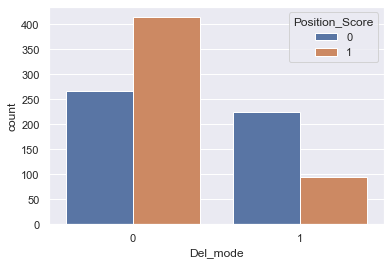

In [100]:
sns.countplot(x='Del_mode',data=new_df,hue='Position_Score')

<AxesSubplot:>

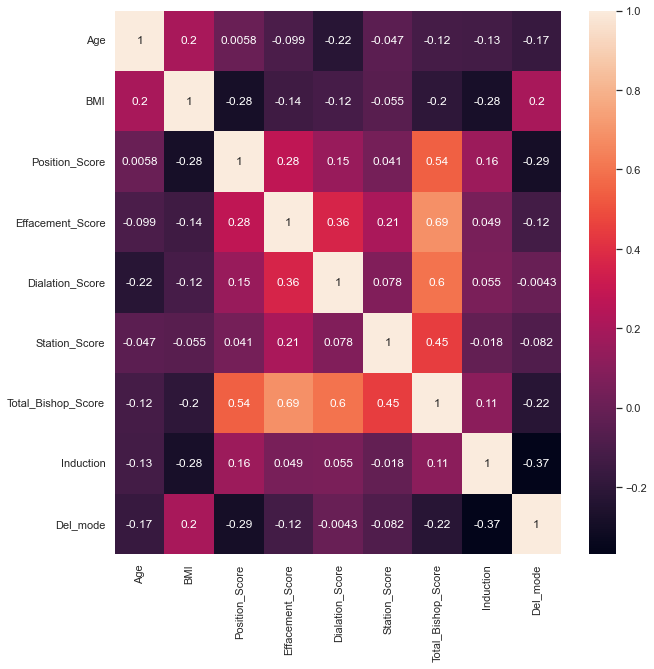

In [101]:
plt.figure(figsize=(10,10))
sns.heatmap(data= new_df.corr(), annot=True)   #By using heatmap we are showing correlation value.

In [102]:
y = new_df['Del_mode']
X = new_df.drop(['Del_mode'],axis=1)

In [103]:
X1=pd.get_dummies(X, columns=['Ob_Score'],drop_first=True)  #one hot encoding 
X1.head()

,Age,BMI,Position_Score,Effacement_Score,Dialation_Score,Station_Score,Total_Bishop_Score,Induction,Ob_Score_G2A1,Ob_Score_G3A2
0,20,28.255713,0,0,1,0,3,1,0,0
1,21,29.772191,0,1,1,0,4,1,0,0
2,21,28.511248,0,1,1,0,4,1,0,0
3,22,28.772695,0,1,1,0,4,1,0,0
4,22,27.488918,0,0,1,0,3,1,0,0


In [104]:
from imblearn.over_sampling import SMOTE         #oversampling data
sm=SMOTE()
x,y= sm.fit_resample(X1,y)

In [105]:
y.value_counts()

1    680
0    680
Name: Del_mode, dtype: int64

In [106]:
y.shape

(1360,)

In [107]:
#from sklearn.utils import resample
                                                                     #Unbalance data performing using under sampling techniques.
# setting up testing and training sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

# concatenate our training data back together
#df= pd.concat([X_train, y_train], axis=1)

#df_majority = df[df.Del_mode==0]
#df_minority = df[df.Del_mode==1]
 
# Downsample majority class
#df_majority_downsampled = resample(df_majority, 
                                # replace=False,    # sample without replacement
                                # n_samples=len(df_minority),  # to match minority class
                                 #random_state=1234) # reproducible results
 
# Combine minority class with downsampled majority class
#df1 = pd.concat([df_majority_downsampled, df_minority])
 


In [108]:
x.shape

(1360, 10)

In [109]:
x.head()

,Age,BMI,Position_Score,Effacement_Score,Dialation_Score,Station_Score,Total_Bishop_Score,Induction,Ob_Score_G2A1,Ob_Score_G3A2
0,20,28.255713,0,0,1,0,3,1,0,0
1,21,29.772191,0,1,1,0,4,1,0,0
2,21,28.511248,0,1,1,0,4,1,0,0
3,22,28.772695,0,1,1,0,4,1,0,0
4,22,27.488918,0,0,1,0,3,1,0,0


In [110]:
#Visualization### 

<AxesSubplot:xlabel='Age', ylabel='count'>

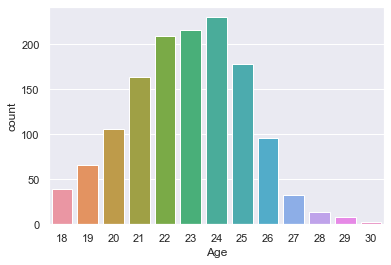

In [111]:
sns.countplot(x['Age'])

<AxesSubplot:xlabel='Position_Score', ylabel='count'>

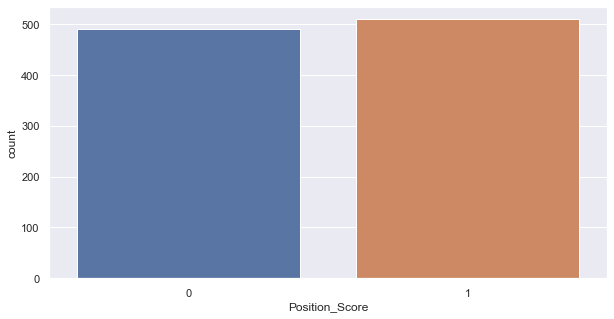

In [112]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['Position_Score'])

<AxesSubplot:xlabel='Age'>

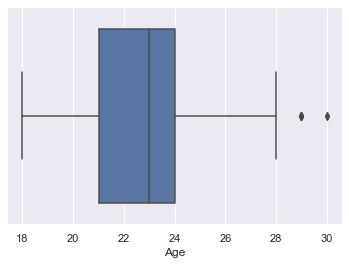

In [113]:
sns.boxplot(x['Age'])

<AxesSubplot:xlabel='Age', ylabel='Del_mode'>

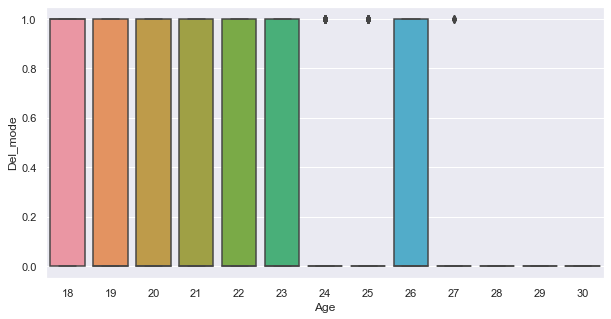

In [114]:
plt.figure(figsize=(10,5))
sns.boxplot(x =df['Age'], y =df['Del_mode'])

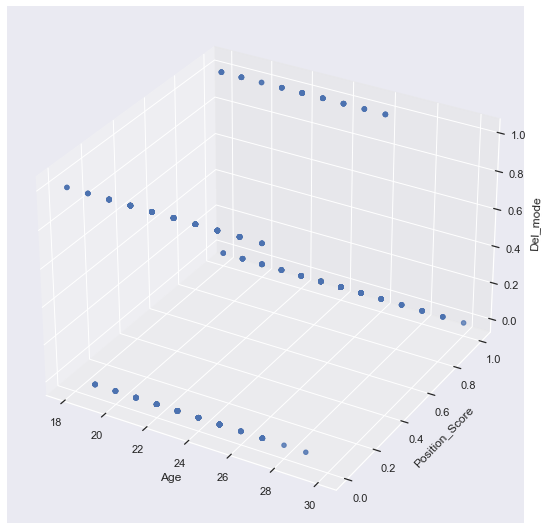

In [115]:
from mpl_toolkits.mplot3d import Axes3D

sns.set(style = "darkgrid")

fig = plt.figure(figsize=(9.5,9.5))
ax = fig.add_subplot(111, projection = '3d')

x1 = df['Age']
y1 = df['Position_Score']
z = df['Del_mode']

ax.set_xlabel('Age')
ax.set_ylabel('Position_Score')
ax.set_zlabel('Del_mode')

ax.scatter(x1, y1, z)
plt.show()



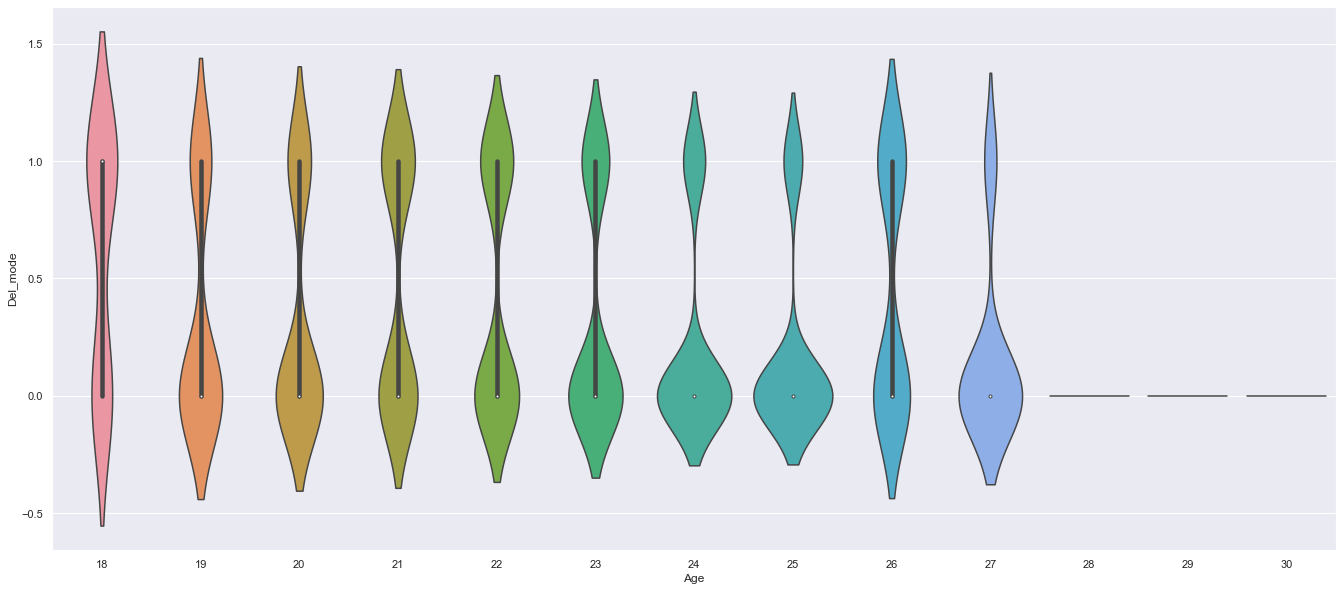

In [116]:
plt.figure(figsize=(23,10))
ax = sns.violinplot(x="Age", y="Del_mode", data=df)

In [117]:
x.head()

,Age,BMI,Position_Score,Effacement_Score,Dialation_Score,Station_Score,Total_Bishop_Score,Induction,Ob_Score_G2A1,Ob_Score_G3A2
0,20,28.255713,0,0,1,0,3,1,0,0
1,21,29.772191,0,1,1,0,4,1,0,0
2,21,28.511248,0,1,1,0,4,1,0,0
3,22,28.772695,0,1,1,0,4,1,0,0
4,22,27.488918,0,0,1,0,3,1,0,0


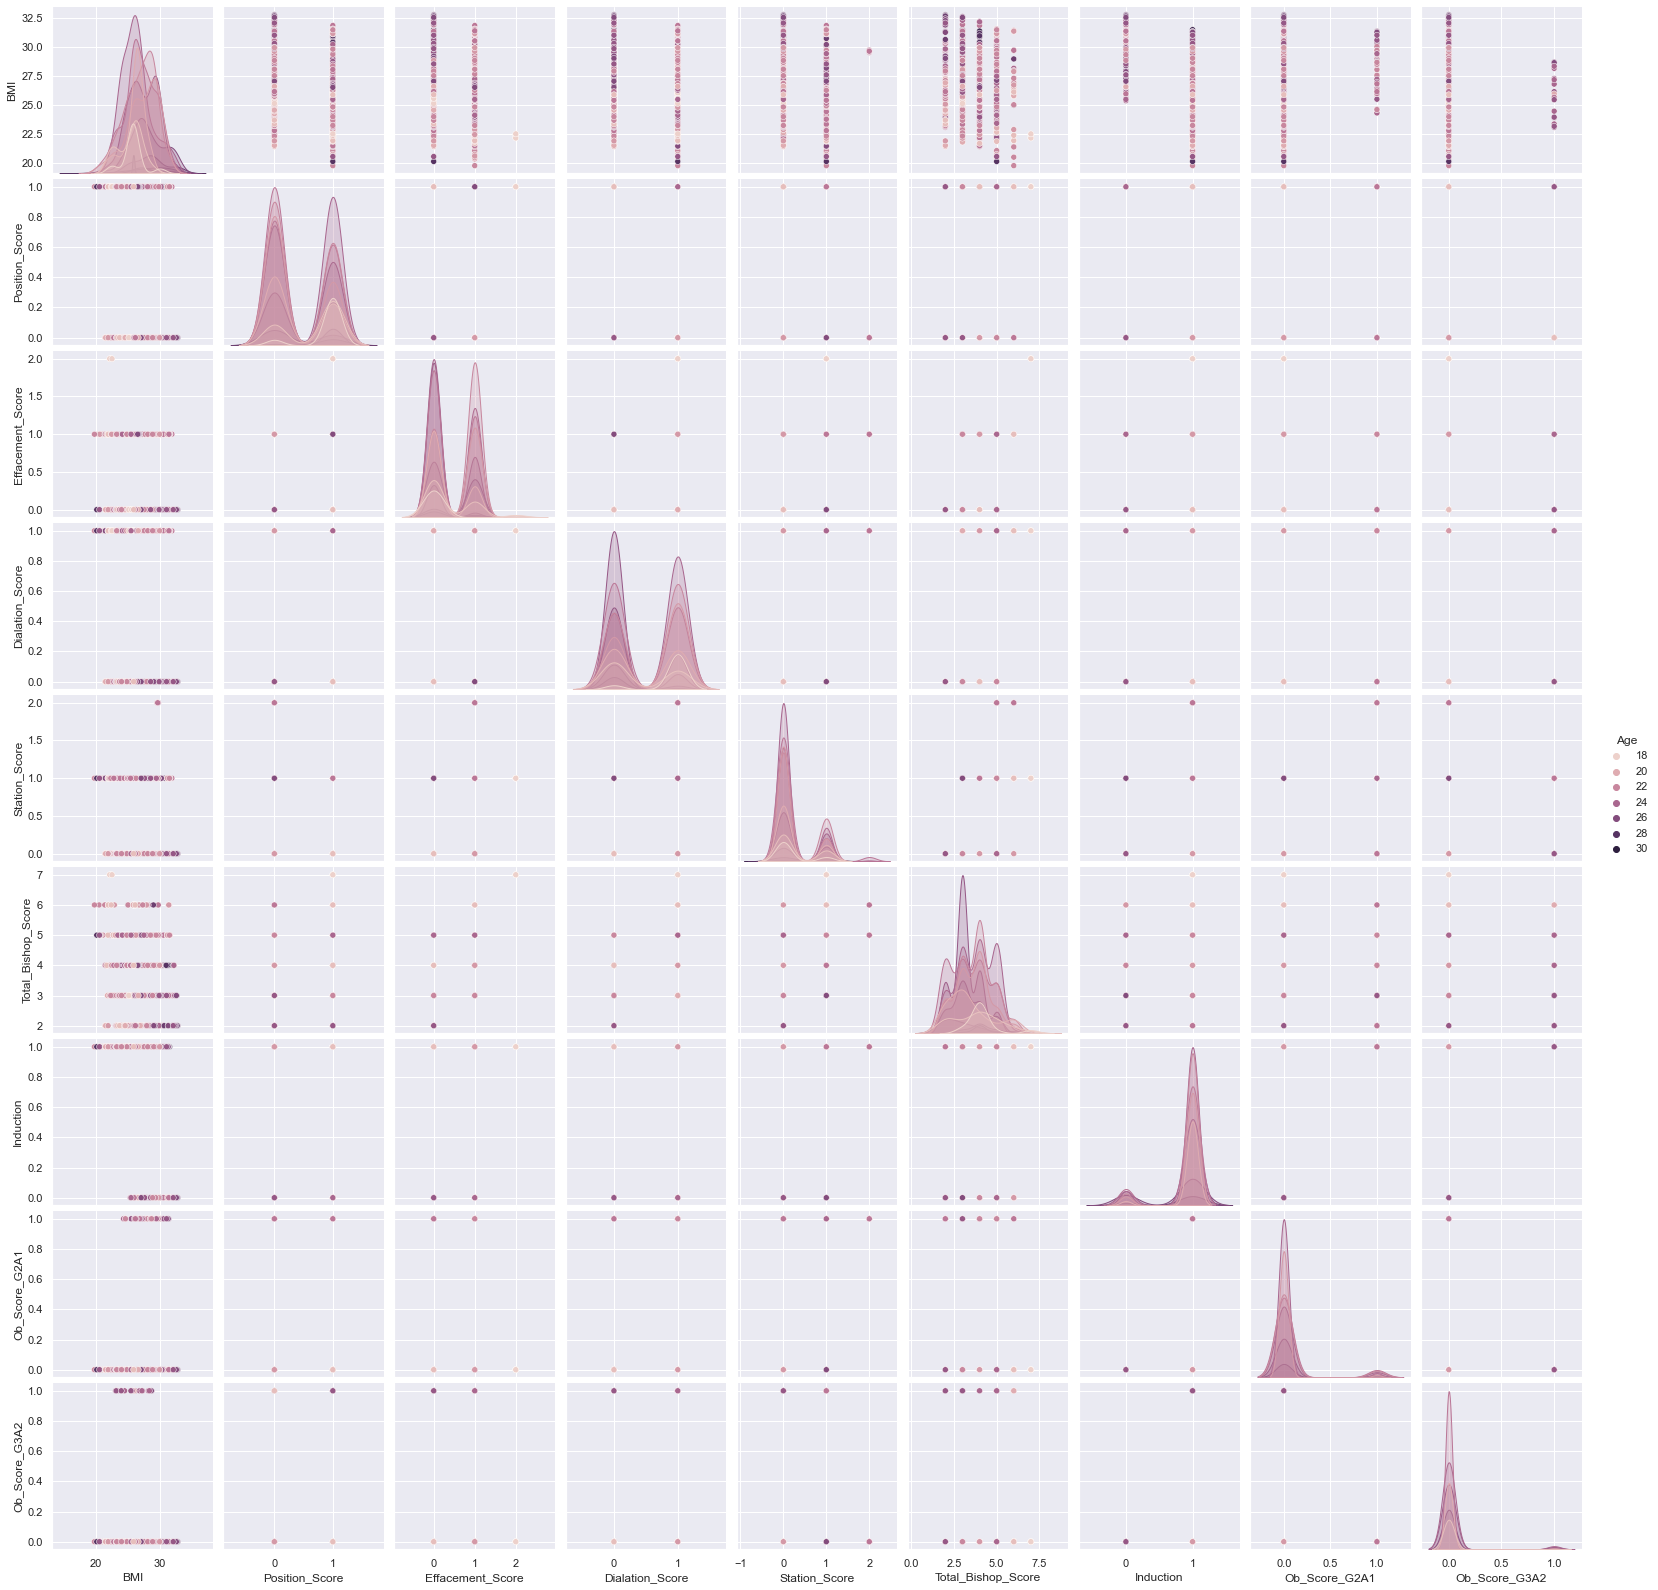

In [118]:
#using pair plot
import seaborn
import matplotlib.pyplot as plt
df = seaborn.load_dataset('tips')
seaborn.pairplot(x, hue ='Age')
plt.show()


In [119]:
x.head()

,Age,BMI,Position_Score,Effacement_Score,Dialation_Score,Station_Score,Total_Bishop_Score,Induction,Ob_Score_G2A1,Ob_Score_G3A2
0,20,28.255713,0,0,1,0,3,1,0,0
1,21,29.772191,0,1,1,0,4,1,0,0
2,21,28.511248,0,1,1,0,4,1,0,0
3,22,28.772695,0,1,1,0,4,1,0,0
4,22,27.488918,0,0,1,0,3,1,0,0


In [120]:
#Model Building ##

In [121]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [122]:
# standardization
from sklearn.preprocessing import StandardScaler           #In Standardization we subtract by the variable mean and divide by the standard deviation
SS = StandardScaler()
SS

X_scale = SS.fit_transform(x)

In [123]:
# apply normalization  --> 0 to 1
from sklearn.preprocessing import MinMaxScaler      #In Normalization we subtract by the minimum value divided by the variable range
MM = MinMaxScaler()
df_MM = MM.fit_transform(x)
df_MM = pd.DataFrame(df_MM)
df_MM.describe()

,0,1,2,3,4,5,6,7,8,9
count,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000
mean,0.405637,0.543051,0.456618,0.204044,0.462500,0.109191,0.310441,0.900735,0.044118,0.014706
std,0.187503,0.184729,0.498298,0.249544,0.498775,0.212790,0.215942,0.299127,0.205432,0.120417
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.432319,0.000000,0.000000,0.000000,0.000000,0.200000,1.000000,0.000000,0.000000
50%,0.416667,0.523959,0.000000,0.000000,0.000000,0.000000,0.400000,1.000000,0.000000,0.000000
75%,0.500000,0.677866,1.000000,0.500000,1.000000,0.000000,0.400000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [124]:
print(x.shape)
y.shape

(1360, 10)


(1360,)

In [218]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20,  #splitting training and test
                                                    random_state = 0)

In [235]:
crosscv=cross_val_score(model,x,y,cv=KFold(10),scoring='accuracy')

In [236]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [237]:
# predictions
y_pred = logreg.predict(X_test)

In [238]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 86,  44],
       [ 34, 108]], dtype=int64)

In [239]:
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score

In [224]:
ac = accuracy_score(y_test,y_pred)
rs = recall_score(y_test,y_pred)
ps = precision_score(y_test,y_pred)
fs = f1_score(y_test,y_pred)
print("Accuracy score: ",ac.round(2))
print("Sensitivity/Recall score: ",rs.round(2))
print("precision score: ",ps.round(2))
print("F1 score: ",fs.round(2))

Accuracy score:  0.71
Sensitivity/Recall score:  0.76
precision score:  0.71
F1 score:  0.73


In [240]:
##K-nn Classifier

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2) # p=2 --> eucledian
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [241]:
Y_pred_train = knn.predict(X_train)
Y_pred_test = knn.predict(X_test)

from sklearn.metrics import accuracy_score
Training_accuracy = accuracy_score(y_train,Y_pred_train)
Test_accuracy = accuracy_score(y_test,Y_pred_test)
print("Training_accuracy:" , Training_accuracy.round(3))
print("Test_accuracy:" , Test_accuracy.round(3))

Training_accuracy: 0.956
Test_accuracy: 0.949


In [242]:
from xgboost import XGBClassifier
XGBClassifier() # eta=0.001,gamma=10,learning_rate=1,reg_lambda=1,n_estimators=100

models = []
models.append(('LogisticRegression', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier()))

In [243]:
type(models[0])
models[0][0] # name
models[0][1] # function


LogisticRegression()

In [244]:
for name, model in models:
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]

    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0),name)
    



Accuracy: 71.32% LogisticRegression
Accuracy: 94.85% KNN
Accuracy: 64.71% SVM
Accuracy: 90.81% Decision Tree Classifier


In [245]:
##XGB##

from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [246]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

#evaluate predictions train vs test data
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.59%


In [247]:
#Random Forest

In [248]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(max_features=0.5,max_depth=4,n_estimators=100,bootstrap=False,random_state=24)
RFC.fit(X_train,y_train)
y_pred_train = RFC.predict(X_train)
y_pred_test = RFC.predict(X_test)

In [249]:
Training_score = accuracy_score(y_train,y_pred_train).round(2)
Test_score = accuracy_score(y_test,y_pred_test).round(2)
print("Training_score:",Training_score)
print("Test_score:",Test_score)


Training_score: 0.83
Test_score: 0.85


In [250]:
#SVM

In [251]:
# Loading SVC 
# Training a classifier - kernel='rbf'
from sklearn.svm import SVC
# clf = SVC(kernel='linear')
# clf = SVC(kernel='poly',degree=3)
clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test  = clf.predict(X_test)

In [252]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9558823529411765


In [253]:
# import the metrics class
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred_test)
print(cm)

print("Training Accuracy :",metrics.accuracy_score(y_train, y_pred_train).round(2))
print("Testing Accuracy:",metrics.accuracy_score(y_test, y_pred_test).round(2))

[[ 74  56]
 [ 40 102]]
Training Accuracy : 0.71
Testing Accuracy: 0.65


In [254]:
# model fitting
from sklearn.tree import DecisionTreeClassifier  
DT = DecisionTreeClassifier(max_depth=6) 

DT.fit(X_train,y_train)

Y_pred_train = DT.predict(X_train)
Y_pred_test = DT.predict(X_test)


In [255]:
from sklearn.metrics import accuracy_score
Training_accuracy = accuracy_score(y_train,Y_pred_train).round(2)
Test_accuracy = accuracy_score(y_test,Y_pred_test).round(2)

print("Training_accuracy: ",Training_accuracy)
print("Test_accuracy: ",Test_accuracy)

Training_accuracy:  0.84
Test_accuracy:  0.84


In [256]:
###Hyper parameter###

In [257]:
#Hyper parameter using Logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
 
# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
 
# Instantiating logistic regression classifier
logreg = LogisticRegression()
 
# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)
 
logreg_cv.fit(x, y)
 
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 31.622776601683793}
Best score is 0.7125


In [258]:
#Hyper parameter using DecisionTreeClassifier



from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
 
# Creating the hyperparameter grid
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
 
# Instantiating Decision Tree classifier
tree = DecisionTreeClassifier()
 
# Instantiating RandomizedSearchCV object
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5)
 
tree_cv.fit(x, y)
 
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 7, 'min_samples_leaf': 6}
Best score is 0.8404411764705882


In [259]:
#Hyper parameter using KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

train_scores, test_scores = list(), list()

values = [i for i in range(1, 10)]

for i in values:
    model = KNeighborsClassifier(n_neighbors=i)

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    train_score = accuracy_score(y_train, y_train_pred)
    train_scores.append(train_score)

    y_test_pred = model.predict(X_test)
    test_score = accuracy_score(y_test, y_test_pred)
    test_scores.append(test_score)

    print('> %d, train: %.3f, test: %.3f' % (i, train_score, test_score))

> 1, train: 1.000, test: 0.960
> 2, train: 0.975, test: 0.960
> 3, train: 0.969, test: 0.960
> 4, train: 0.959, test: 0.952
> 5, train: 0.956, test: 0.949
> 6, train: 0.949, test: 0.952
> 7, train: 0.942, test: 0.934
> 8, train: 0.942, test: 0.941
> 9, train: 0.929, test: 0.934


In [260]:
#Hyper parameter using DecisionTreeClassifier


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

train_scores, test_scores = list(), list()

values = [i for i in range(1, 10)]

for i in values:
    model = DecisionTreeClassifier(max_depth=i)

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    train_score = accuracy_score(y_train, y_train_pred)
    train_scores.append(train_score)

    y_test_pred = model.predict(X_test)
    test_score = accuracy_score(y_test, y_test_pred)
    test_scores.append(test_score)

    print('> %d, train: %.3f, test: %.3f' % (i, train_score, test_score))

> 1, train: 0.637, test: 0.676
> 2, train: 0.640, test: 0.684
> 3, train: 0.737, test: 0.717
> 4, train: 0.742, test: 0.721
> 5, train: 0.808, test: 0.805
> 6, train: 0.845, test: 0.842
> 7, train: 0.891, test: 0.875
> 8, train: 0.920, test: 0.897
> 9, train: 0.944, test: 0.901
